In [2]:
#importing libraries

import numpy as np
import pandas as pd
import urllib
import xlrd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# this allows plots to appear directly in the notebook
%matplotlib inline

In [3]:
data = pd.read_csv ('yelp.csv')

In [4]:
data.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
business_id     174567 non-null object
name            174567 non-null object
neighborhood    68015 non-null object
address         174567 non-null object
city            174566 non-null object
state           174566 non-null object
postal_code     173944 non-null object
latitude        174566 non-null float64
longitude       174566 non-null float64
stars           174567 non-null float64
review_count    174567 non-null int64
is_open         174567 non-null int64
categories      174567 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


In [6]:
# do we have any missing data? Avoid correl neighbohood and postal code
data.isnull().sum()

business_id          0
name                 0
neighborhood    106552
address              0
city                 1
state                1
postal_code        623
latitude             1
longitude            1
stars                0
review_count         0
is_open              0
categories           0
dtype: int64

In [7]:
#check correl 
data.corr()

,latitude,longitude,stars,review_count,is_open
latitude,1.000000,0.839805,-0.053424,-0.074705,-0.006975
longitude,0.839805,1.000000,-0.034137,-0.095415,0.008143
stars,-0.053424,-0.034137,1.000000,0.030115,0.051798
review_count,-0.074705,-0.095415,0.030115,1.000000,0.035367
is_open,-0.006975,0.008143,0.051798,0.035367,1.000000


In [ ]:
pd.scatter_matrix(data, figsize=(30,30))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dd11a1860>,
      dtype=object)

In [9]:
# create a fitted model in one line
lm = smf.ols(formula='stars ~ is_open + review_count', data=data).fit()

# print the coefficients!
lm.params

Intercept       3.506486
is_open         0.139208
review_count    0.000289
dtype: float64

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     305.1
Date:                Sun, 04 Mar 2018   Prob (F-statistic):          5.09e-133
Time:                        05:35:08   Log-Likelihood:            -2.4805e+05
No. Observations:              174567   AIC:                         4.961e+05
Df Residuals:                  174564   BIC:                         4.961e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.5065      0.006    581.802      0.000       3.495       3.518
is_open          0.1392      0.007     21.247      0.000       0.126       0.152
review_count     0.0003   2.44e-05     11.845      0.000       0.000       0.000
==============================================================================
Omnibus:                     7952.272   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8651.343
Skew:                          -0.526   Prob(JB):                         0.00
Kurtosis:                       2.715   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#doing with other dataset as mine has not good correl
import urllib
import xlrd
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original") 

In [23]:
df.describe(include = "all")

,"18.0 8. 307.0 130.0 3504. 12.0 70. 1. ""chevrolet chevelle malibu"""
count,405
unique,405
top,15.0 8. 304.0 150.0 3892. 1...
freq,1


In [24]:
df.head()

,"18.0 8. 307.0 130.0 3504. 12.0 70. 1. ""chevrolet chevelle malibu"""
0,15.0 8. 350.0 165.0 3693. 1...
1,18.0 8. 318.0 150.0 3436. 1...
2,16.0 8. 304.0 150.0 3433. 1...
3,17.0 8. 302.0 140.0 3449. 1...
4,15.0 8. 429.0 198.0 4341. 1...


In [103]:
table = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original', header=None)
table.columns = ['attributes','car']
table.head()
table_2 = table.iloc[:,0:1]
table_2.head()

,attributes
0,18.0 8. 307.0 130.0 3504. 1...
1,15.0 8. 350.0 165.0 3693. 1...
2,18.0 8. 318.0 150.0 3436. 1...
3,16.0 8. 304.0 150.0 3433. 1...
4,17.0 8. 302.0 140.0 3449. 1...


In [101]:
table_2.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration','model_year','origin']


ValueError: Length mismatch: Expected axis has 1 elements, new values have 8 elements

SyntaxError: invalid syntax (<ipython-input-93-6a68c4841d80>, line 1)

In [99]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration','model_year','origin']
table_2.head()


ValueError: Length mismatch: Expected axis has 1 elements, new values have 8 elements

In [100]:

df_cols = [ 'mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',sep='/t', header=None,names=df_cols)
df.columns = df.columns.str.replace(' ', '_')
df.head()


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0 8 307.0 130.0 3504. 12...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.0 8 350.0 165.0 3693. 11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18.0 8 318.0 150.0 3436. 11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.0 8 304.0 150.0 3433. 12...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.0 8 302.0 140.0 3449. 10...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0 8 307.0 130.0 3504. 12...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.0 8 350.0 165.0 3693. 11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18.0 8 318.0 150.0 3436. 11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.0 8 304.0 150.0 3433. 12...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.0 8 302.0 140.0 3449. 10...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
#roubei
data_csv = pd.read_csv('car_mpg.csv')

In [106]:
data_csv.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu""",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320""",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite""",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst""",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino""",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
data_csv_clean = data_csv.iloc[:,0:9]
data_csv_clean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""


In [108]:
data_csv_clean.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [109]:
data_csv_clean.corr()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [110]:
# create a fitted model in one line
lm = smf.ols(formula='mpg ~ cylinders + displacement + weight', data=data_csv_clean).fit()

# print the coefficients!
lm.params

Intercept       44.447236
cylinders       -0.243929
displacement    -0.012837
weight          -0.005763
dtype: float64

In [111]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     303.9
Date:                Sun, 04 Mar 2018   Prob (F-statistic):          4.12e-102
Time:                        11:14:05   Log-Likelihood:                -1144.2
No. Observations:                 398   AIC:                             2296.
Df Residuals:                     394   BIC:                             2312.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       44.4472      1.482     29.989      0.000      41.533      47.361
cylinders       -0.2439      0.412     -0.593      0.554      -1.053       0.565
displacement    -0.0128      0.008     -1.552      0.122      -0.029       0.003
weight          -0.0058      0.001     -8.103      0.000      -0.007      -0.004
==============================================================================
Omnibus:                       44.949   Durbin-Watson:                   0.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.715
Skew:                           0.751   Prob(JB):                     3.26e-15
Kurtosis:                       4.329   Cond. No.                     2.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
# create a fitted model in one line
lm = smf.ols(formula='mpg ~ cylinders + displacement + weight + origin + model_year + acceleration', data=data_csv_clean).fit()

# print the coefficients!
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     298.0
Date:                Sun, 04 Mar 2018   Prob (F-statistic):          1.82e-142
Time:                        11:17:09   Log-Likelihood:                -1040.7
No. Observations:                 398   AIC:                             2095.
Df Residuals:                     391   BIC:                             2123.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -19.7558      4.140     -4.772      0.000     -27.896     -11.616
cylinders       -0.3848      0.320     -1.204      0.229      -1.013       0.244
displacement     0.0171      0.007      2.371      0.018       0.003       0.031
weight          -0.0070      0.001    -12.031      0.000      -0.008      -0.006
origin           1.3691      0.269      5.086      0.000       0.840       1.898
model_year       0.7659      0.049     15.541      0.000       0.669       0.863
acceleration     0.1520      0.077      1.966      0.050    1.31e-05       0.304
==============================================================================
Omnibus:                       29.660   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.068
Skew:                           0.500   Prob(JB):                     3.65e-11
Kurtosis:                       4.377   Cond. No.                     7.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

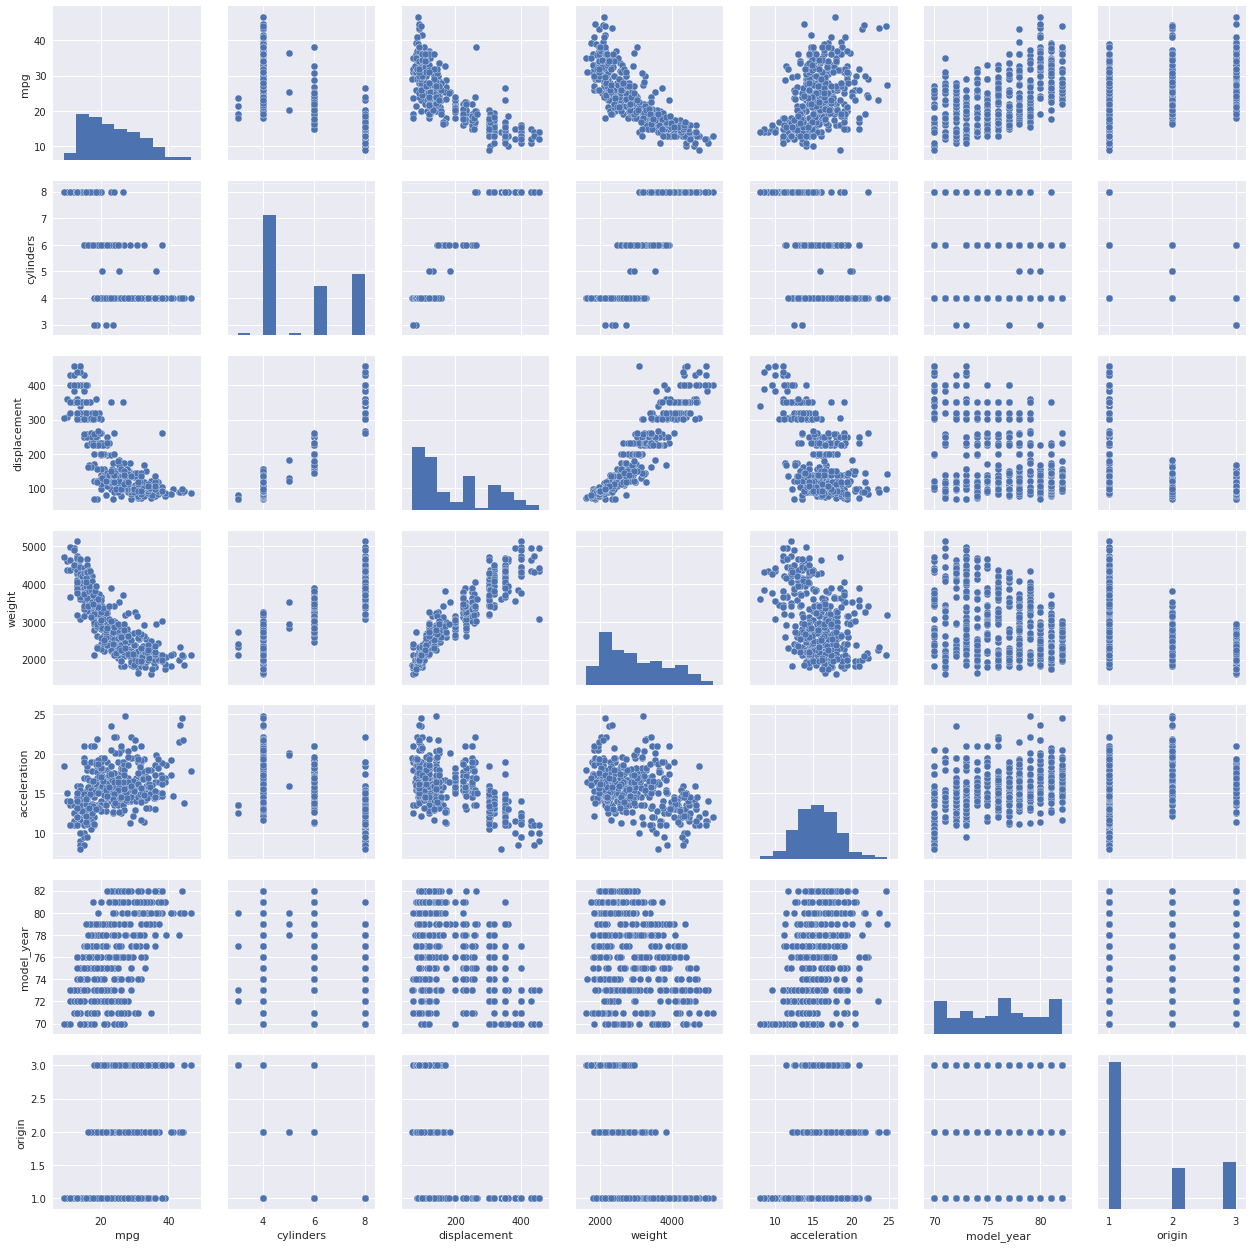

In [122]:
sns.pairplot(data_csv_clean);

In [123]:
# create a fitted model in one line
lm = smf.ols(formula='weight ~ displacement', data=data_csv_clean).fit()

# print the coefficients!
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     2654.
Date:                Sun, 04 Mar 2018   Prob (F-statistic):          1.22e-177
Time:                        11:19:32   Log-Likelihood:                -2841.1
No. Observations:                 398   AIC:                             5686.
Df Residuals:                     396   BIC:                             5694.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1505.0187     32.306     46.586      0.000    1441.506    1568.532
displacement     7.5761      0.147     51.516      0.000       7.287       7.865
==============================================================================
Omnibus:                       38.997   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.188
Skew:                          -0.173   Prob(JB):                     5.03e-42
Kurtosis:                       6.369   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

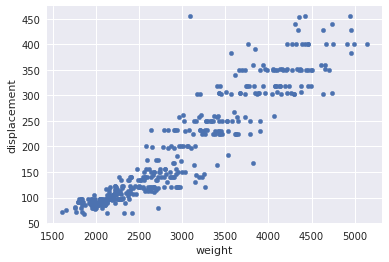

In [124]:
data_csv_clean.plot(kind='scatter', x='weight', y='displacement');

In [129]:
# create a DataFrame with the minimum and maximum values of EstimatedPrice
# these values will be be used in the built model to predict the Price
X_new = pd.DataFrame({'displacement': [data_csv_clean.displacement.min(), data_csv_clean.displacement.max()]})
X_new.head()

,displacement
0,68.0
1,455.0


In [130]:
preds = lm.predict(X_new)
preds

0    2020.190749
1    4952.125618
dtype: float64

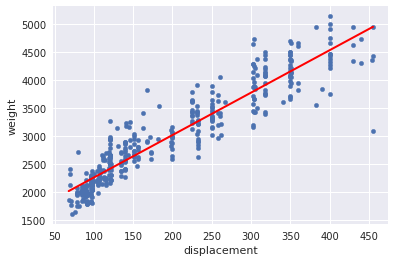

In [132]:
data_csv_clean.plot(kind='scatter', x='displacement', y='weight');
plt.plot(X_new, preds, c='red', linewidth=2)

In [ ]:
#duvidas: 
#como trabalhar a base no formato que esta sem roubar - vc tem duas colunas, e uma com multiplos attributos. 
#tentou separar e dividir, mas veio sem heads. tentou puxar a tabela nova criada com iloc na estrutura de heads e nn rolou.
#plota primeiro e depois acha a relacao linear e traca? mpg tem curvinha, sinal de que e mais de uma variavel?

In [133]:
# create a fitted model in one line
lm = smf.ols(formula='weight ~ mpg', data=data_csv_clean).fit()

# print the coefficients!
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Sun, 04 Mar 2018   Prob (F-statistic):          2.97e-103
Time:                        11:28:19   Log-Likelihood:                -3013.1
No. Observations:                 398   AIC:                             6030.
Df Residuals:                     396   BIC:                             6038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5089.4871     74.891     67.958      0.000    4942.253    5236.721
mpg          -90.1170      3.023    -29.814      0.000     -96.059     -84.174
==============================================================================
Omnibus:                        4.301   Durbin-Watson:                   0.860
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                4.131
Skew:                           0.203   Prob(JB):                        0.127
Kurtosis:                       2.709   Cond. No.                         78.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""